In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def MK(n):
    x = np.linspace(0,1,n)
    h = x[1]-x[0]
    
    M = np.zeros((n,n))
    K = np.zeros((n,n))
    
    
    M[0,0:2] = np.array([2,1])
    M[-1,:] = M[0,::-1]
    
    K[0,0:2] = np.array([1,-1])
    K[-1,:] = K[0,::-1]
    
    for i in range(1,n-1):
        M[i,i-1:i+2] = np.array([1,4,1])
        K[i,i-1:i+2] = np.array([-1,2,-1])
    
    return (h/6)*M , (1/h)*K 

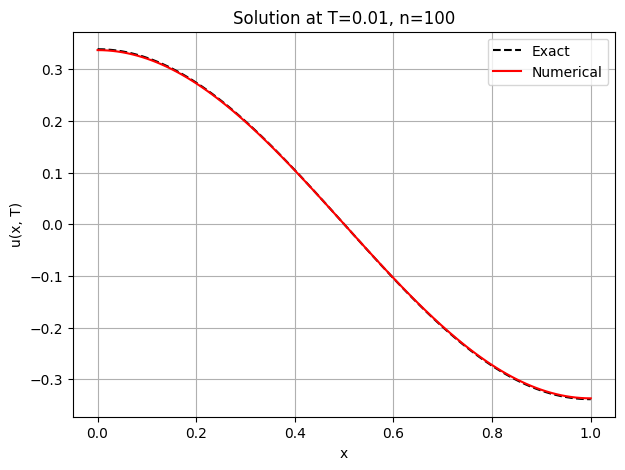

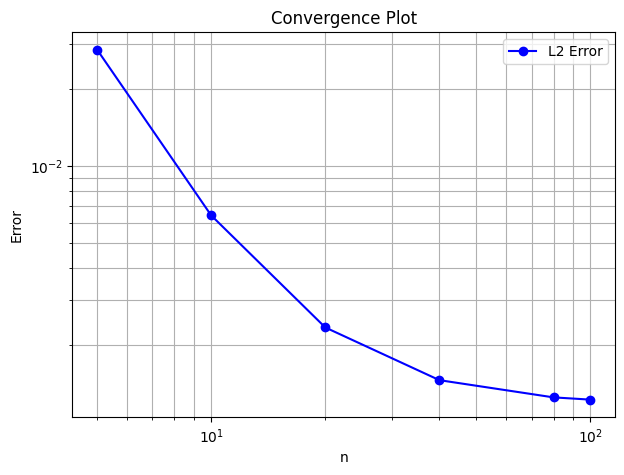

In [ ]:


pi = np.pi
steps = [5,10,20,40,80,100]
dt = 0.0001
T = 0.01
c = (pi**4 + pi**2 + 1)

errors = []
solutions = []



for n in steps:
    M, K = MK(n)
    x = np.linspace(0, 1, n)
    t = 0  
    u_0 = np.exp(-c*t)*np.cos(pi*x)
    
    while t <= T:
        z = np.zeros(n)
        u_e = np.exp(-c*t)*np.cos(pi*x)
        f = np.zeros(n)
        F = M@f + (1/dt)*(M@u_0)
        f_force = np.hstack((z, F))
        
        A_00 = M
        A_01 = -K
        A_10 = K
        A_11 = K + (1+1/dt)*M
        
        A = np.block([[A_00, A_01],
                      [A_10, A_11]])
        
        linear_solve = np.linalg.solve(A, f_force)
        v_solve = linear_solve[:n]
        u_solve = linear_solve[n:]
        
        u_0 = u_solve
        t += dt

    error = np.linalg.norm(u_solve - u_e, 2)/np.sqrt(n)
    errors.append(error)
    solutions.append((x, u_solve, u_e))

# Plot final solution
x, u_solve, u_e = solutions[-1]
plt.figure(figsize=(7,5))
plt.plot(x, u_e, 'k--', label='Exact')
plt.plot(x, u_solve, 'r-', label='Numerical')
plt.legend()
plt.title(f'Solution at T={T}, n={steps[-1]}')
plt.xlabel("x")
plt.ylabel("u(x, T)")
plt.grid(True)
plt.show()

# Plot error convergence
plt.figure(figsize=(7,5))
plt.loglog(steps, errors, 'bo-', label='L2 Error')
plt.xlabel('n')
plt.ylabel('Error')
plt.title('Convergence Plot')
plt.grid(True, which='both')
plt.legend()
plt.show()


In [9]:
E1 = errors[0]
E2 = errors[1]
h1 = steps[0]
h2 = steps[1]

order_accuracy = np.log(E1 / E2) // np.log(h1 / h2)
print("Order of Accuracy:", abs(order_accuracy))

Order of Accuracy: 3.0
